In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\ngsng\Downloads\medical_examination.csv")
df.head()  #read csv file from local computer

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#We craeted the 'overweight' column, where we set values 0 or 1, if a patient is not overweight (0) or overweight (1). 
height2Meters = (df['height']/100)*(df['height']/100)
IMC = df['weight'] / height2Meters 
df.loc[IMC <= 25, 'overweight'] = 0 
df.loc[IMC > 25, 'overweight'] = 1 
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0


In [4]:
df.loc[df['cholesterol']==1, 'cholesterol'] = 0 
df.loc[df['cholesterol']>1, 'cholesterol'] = 1 
df.loc[df['gluc']==1, 'gluc'] = 0 
df.loc[df['gluc']>1, 'gluc'] = 1

In [5]:
#we prepare the data frame in a long format, to plot by the different variables (diseases).
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])


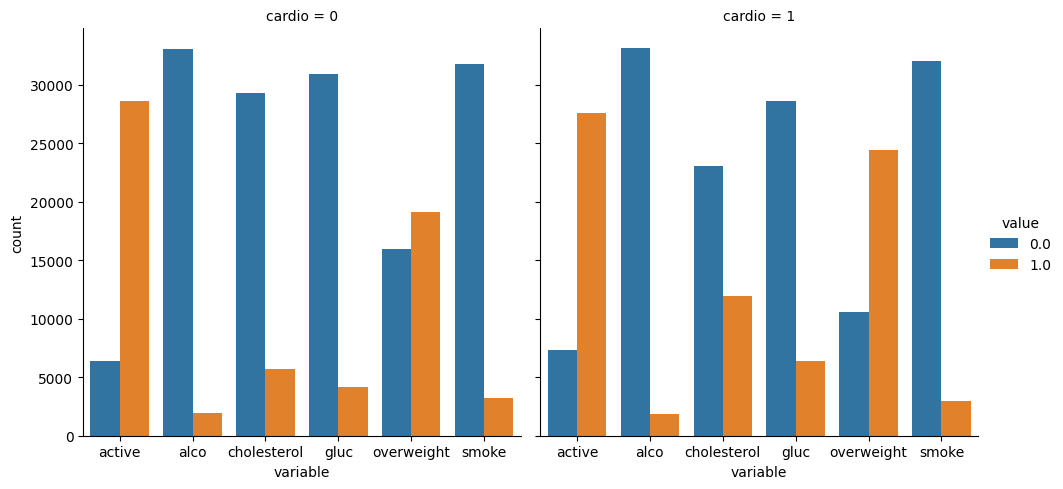

In [10]:
#The count plot by different diseases for two different cardio values is the following:
sns.catplot(x='variable',col='cardio',hue='value',kind='count',data=df_cat)


In [7]:
df_filtered = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & 
(df['height'] < df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] < df['weight'].quantile(0.975))]


In [8]:
Corr = df_filtered.corr()


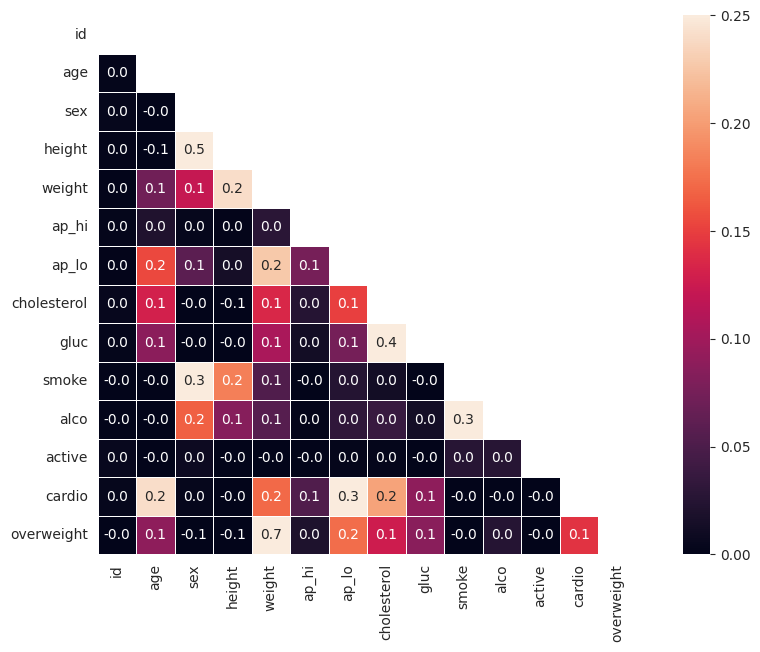

In [9]:
mask = np.zeros_like(Corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, fig = plt.subplots(figsize=(12, 7))
    fig = sns.heatmap(Corr,vmin=0,vmax=.25,square=True,annot=True,linewidths=.5,fmt=".1f",mask=mask)
